### Import libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from PIL import Image

### Load and clean the dataset

In [2]:
# Load the data from the file
file_path = 'cleaned_data.npz'
loaded_data = np.load(file_path, allow_pickle=True)

# Put data into proper arrays
data = loaded_data['data']
labels = loaded_data['labels']

### Data augmentationa

In [3]:
from sklearn.utils import shuffle

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Assuming 'data' is your original data and 'labels' are your original labels
original_data = data
original_labels = labels

# Specify the number of augmented images for each class (adjust as needed)
num_augmented_images_healthy = 100
num_augmented_images_unhealthy = 140

# Create generators for both healthy and unhealthy images
healthy_indices = np.where(original_labels == 'healthy')[0]
unhealthy_indices = np.where(original_labels == 'unhealthy')[0]

healthy_datagen = datagen.flow(original_data[healthy_indices], batch_size=32, shuffle=True)
unhealthy_datagen = datagen.flow(original_data[unhealthy_indices], batch_size=32, shuffle=True)

# Save augmented images and labels
augmented_images_list = []
augmented_labels_list = []

# Augment healthy images
for _ in range(num_augmented_images_healthy):
    augmented_images = healthy_datagen.next()
    for _, image in enumerate(augmented_images):
        augmented_images_list.append(image)
        augmented_labels_list.append('healthy')

# Augment unhealthy images
for _ in range(num_augmented_images_unhealthy):
    augmented_images = unhealthy_datagen.next()
    for _, image in enumerate(augmented_images):
        augmented_images_list.append(image)
        augmented_labels_list.append('unhealthy')

# Concatenate the augmented labels and images to the original data and labels
data_combined, labels_combined = shuffle(
    np.concatenate((original_data, augmented_images_list), axis=0),
    np.concatenate((original_labels, np.array(augmented_labels_list)))
)

# Save the data as .npz
np.savez('data_augmented.npz', data=data_combined, labels=labels_combined)

### Count healthy and unhealthy

In [4]:
# Load the data from the file
file_path = 'data_augmented.npz'
loaded_data = np.load(file_path, allow_pickle=True)

# Put data into proper arrays
data = loaded_data['data']
labels = loaded_data['labels']

healthy = []
unhealthy = []

# Iterate through the images to separate them in the proper set
for i, image in enumerate(data):
    if (labels[i] == 'unhealthy'):
        unhealthy.append(image)
    else:
        healthy.append(image)

print(len(healthy))
print(len(unhealthy))

6248
6266


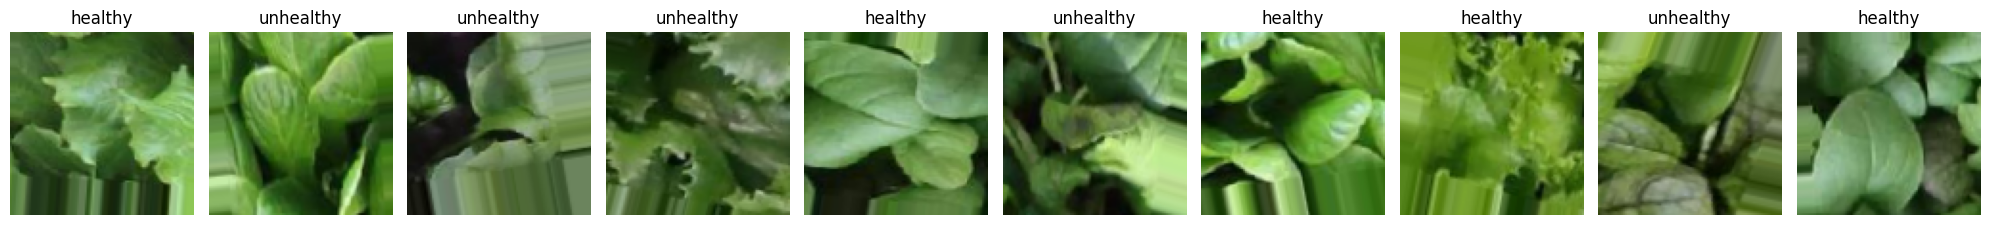

In [16]:
import matplotlib.pyplot as plt
import random

from random import seed
from random import randint

# Number of images to display
num_img = 10

# Create subplots for displaying 10 random items from the dataset
fig, axes = plt.subplots(1, num_img, figsize=(20, 20))
for i in range(num_img):
    value = randint(0, len(augmented_images_list))
    ax = axes[i%num_img]
    ax.imshow(augmented_images_list[value].astype(np.uint8), cmap = 'gray')
    label = augmented_labels_list[value]
    ax.set_title(f'{augmented_labels_list[value]}')
    ax.axis('off')

plt.tight_layout()
plt.show()